# Array Configuration Generation
This notebook generates and visualizes various antenna array configurations for FASR using `fasr_solar_simul` (fss).

In [1]:
import fasr_solar_simul as fss
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
import os

# Speed of light in m/s
C_LIGHT = c
import matplotlib
%matplotlib inline

measures_update ... acquiring the lock ... 
  ... connecting to ftp.astron.nl ...
  ... downloading WSRT_Measures_20260120-160001.ztar from ASTRON server to /Users/fisher/.casa/data ...
  ... measures data updated at /Users/fisher/.casa/data


## Airy Pattern

'airy_model' completed at 2026-01-21 11:51:36; runtime: 0.00 seconds
2 GHz: first local minimum at uv distance = 16.32 m, amplitude = 2.4108e-03
Nyquist frequency: 2 GHz: 1.23 samples per 10 meters
'airy_model' completed at 2026-01-21 11:51:36; runtime: 0.00 seconds
4 GHz: first local minimum at uv distance = 9.01 m, amplitude = 7.6733e-03
Nyquist frequency: 4 GHz: 2.22 samples per 10 meters
'airy_model' completed at 2026-01-21 11:51:36; runtime: 0.00 seconds
10 GHz: first local minimum at uv distance = 3.80 m, amplitude = 9.7896e-03
Nyquist frequency: 10 GHz: 5.26 samples per 10 meters
'airy_model' completed at 2026-01-21 11:51:36; runtime: 0.00 seconds
20 GHz: first local minimum at uv distance = 2.00 m, amplitude = 3.6169e-02
Nyquist frequency: 20 GHz: 9.99 samples per 10 meters


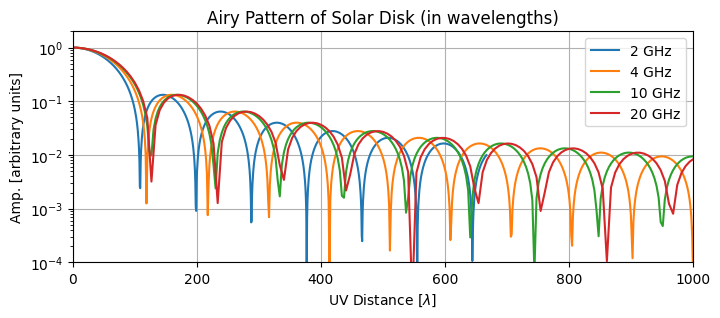

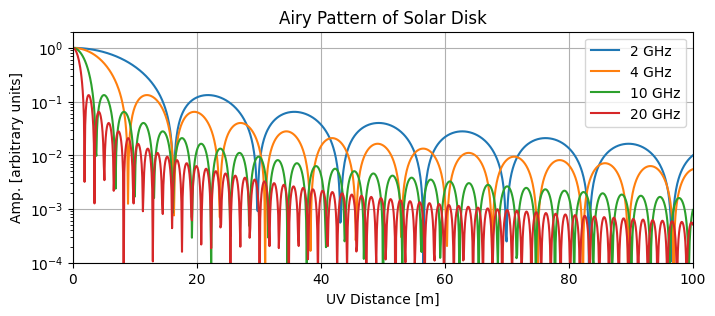

In [2]:
# Fitted parameters for disk_size_function
c1 = 4.08532216e+02
alpha1 = 1.25993061e+00
c2 = 9.91633278e+02
alpha2 = 4.59227095e-03

# Frequencies in GHz to test
frequencies = [2, 4, 10, 20]

# Range of uv distances in meters
uv_meters = np.linspace(0, 100, 1000)  # 0 to 200 m

fig0, ax0 = plt.subplots(figsize=(8, 3))
fig, ax = plt.subplots(figsize=(8, 3))

nyq_sample = {}
for freq in frequencies:
    # 1. Get disk radius in arcseconds at this frequency
    R_arcsec = fss.disk_size_function(freq, c1, alpha1, c2, alpha2)

    # 2. Convert uv distance from meters to wavelengths
    freq_hz = freq * 1e9
    wavelength_m = C_LIGHT / freq_hz
    s_wavelengths = uv_meters / wavelength_m

    # 3. Compute Airy amplitude
    amplitude = fss.airy_model(R_arcsec, s_wavelengths, A=1.0)
    abs_amp = np.abs(amplitude)

    # 4. Plot amplitude vs uv distance in meters
    ax0.plot(s_wavelengths, abs_amp, label=f"{freq} GHz")
    ax.plot(uv_meters, abs_amp, label=f"{freq} GHz")

    # 5. Find the first local minimum using np.gradient
    grad = np.gradient(abs_amp)
    # Find indices where the gradient changes from negative to non-negative:
    crossings = np.where((grad[:-1] < 0) & (grad[1:] >= 0))[0]

    if crossings.size > 0:
        local_min_index = crossings[0] + 1  # offset by 1 because of diff
        nyq_sample[f'{freq} GHz'] = 2 * 10 / uv_meters[local_min_index]
        print(
            f"{freq} GHz: first local minimum at uv distance = {uv_meters[local_min_index]:.2f} m, amplitude = {abs_amp[local_min_index]:.4e}")
        print(f'Nyquist frequency: {freq} GHz: {2 * 10 / uv_meters[local_min_index]:.2f} samples per 10 meters')
    else:
        print(f"{freq} GHz: no local minimum found in the given range.")

ax0.set_xlabel(r"UV Distance [${\lambda}$]")
ax0.set_ylabel("Amp. [arbitrary units]")
ax0.set_title("Airy Pattern of Solar Disk (in wavelengths)")
ax0.set_yscale('log')
ax0.legend()
ax0.grid(True)
ax0.set_ylim(1e-4, 2)
ax0.set_xlim(0, 1000)

ax.set_xlabel("UV Distance [m]")
ax.set_ylabel("Amp. [arbitrary units]")
ax.set_title("Airy Pattern of Solar Disk")
ax.set_yscale('log')
ax.legend()
ax.set_xlim(0, 100)
ax.set_ylim(1e-4, 2)
ax.grid(True)


In [4]:
from importlib import reload
reload(fss)

<module 'fasr_solar_simul' from '/Users/fisher/Library/Mobile Documents/com~apple~CloudDocs/work/research_project/ipynb_scripts_local/fasr-array-config-simul/fasr_solar_simul.py'>

## Fibonacci, Golden, Archimedean, and Pseudo-Random Arrays

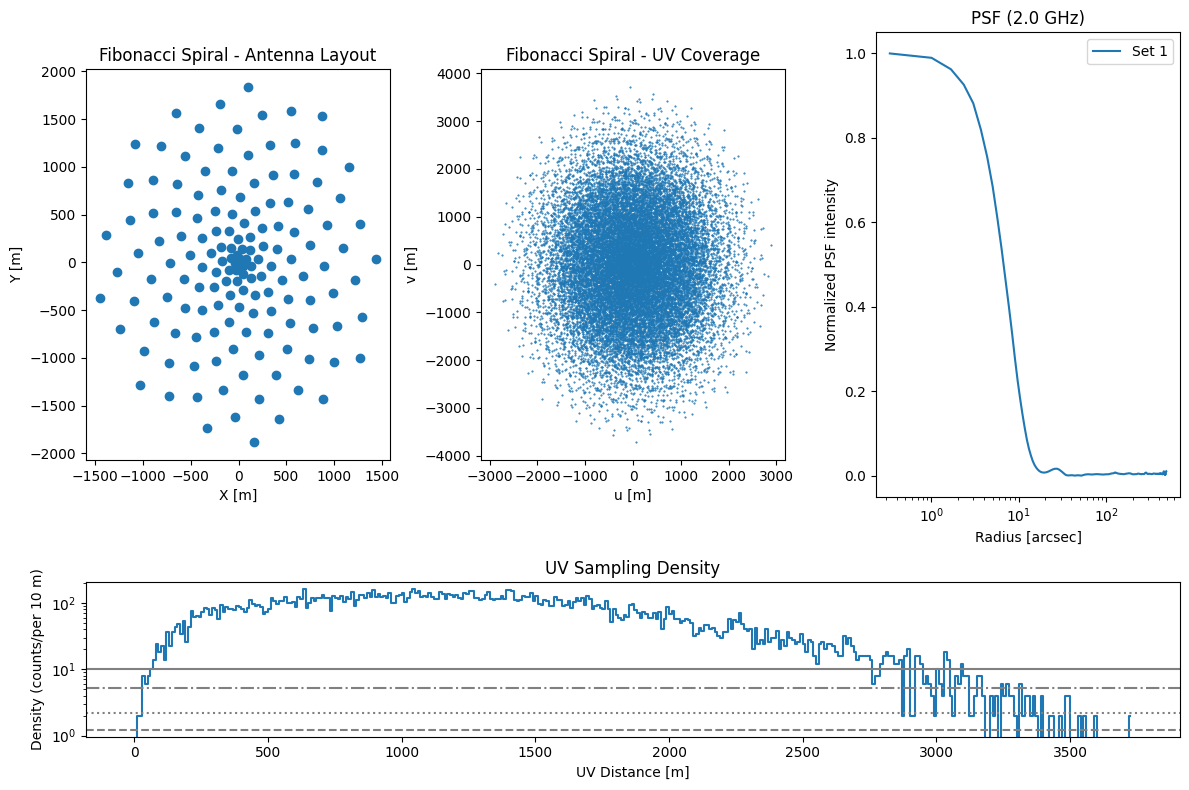

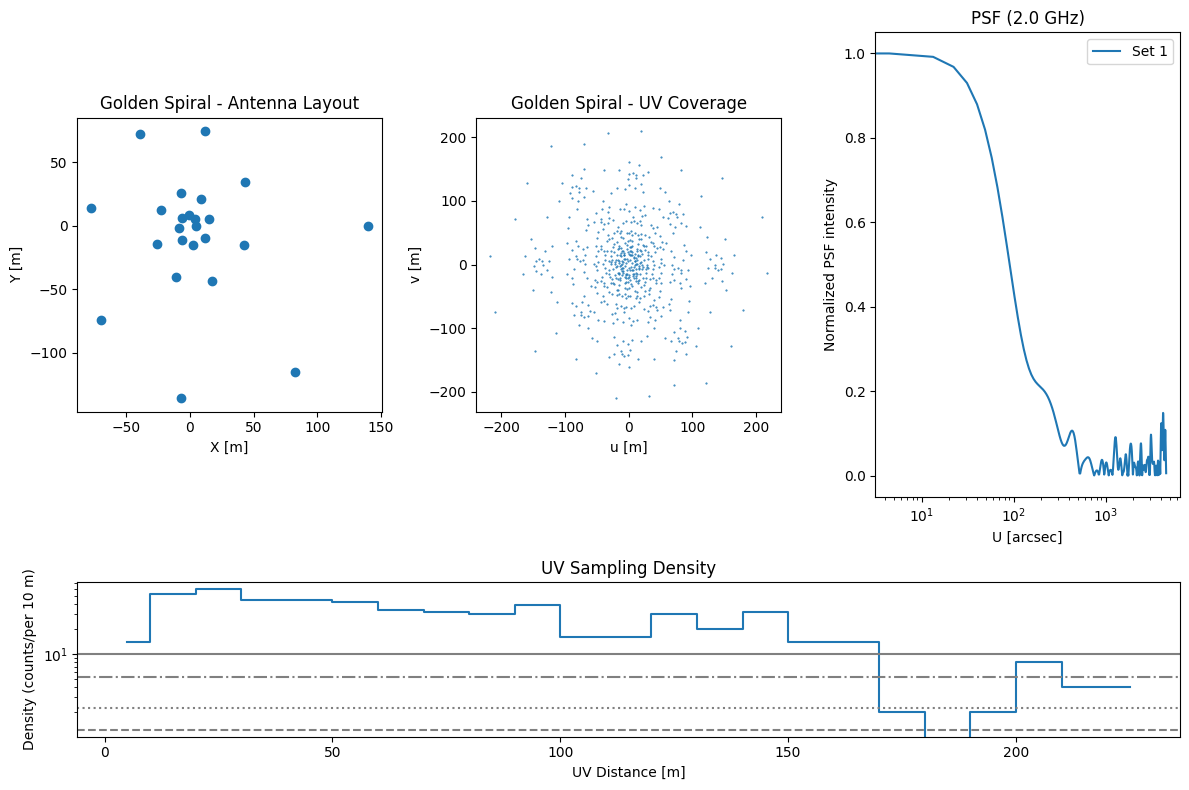

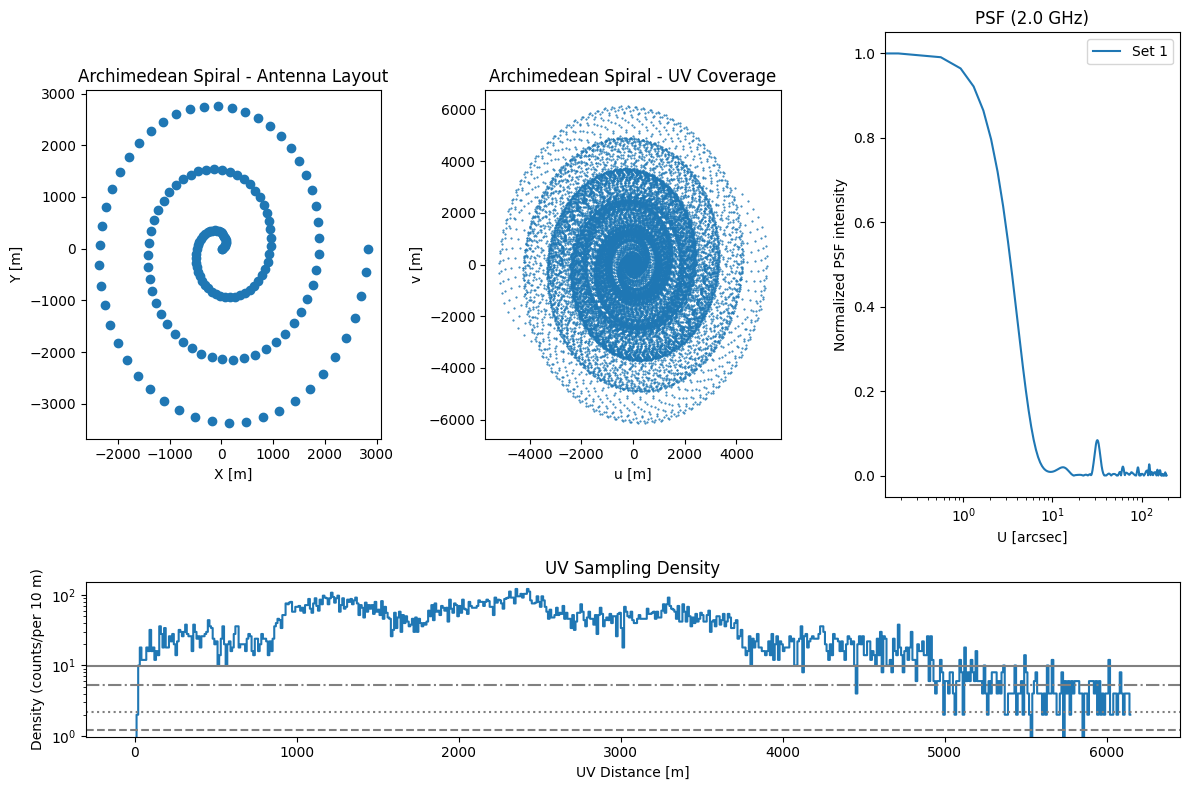

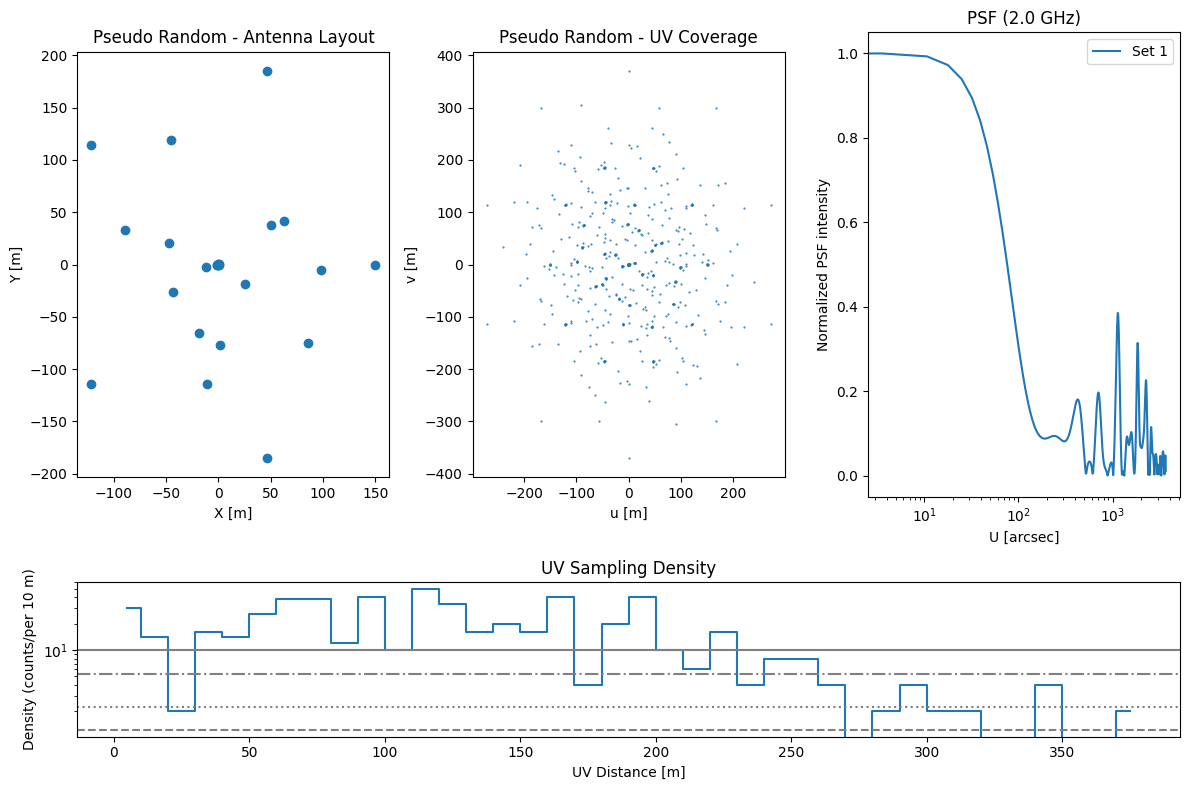

In [44]:
# Fibonacci spiral configuration
positions_fib = fss.generate_fibonacci_spiral_antenna_positions(n_antennas=150, scale=10)
fss.plot_all_panels(positions_fib, "Fibonacci Spiral", nyq_sample=nyq_sample, psf_mode='profile')

# Golden (nautilus) spiral configuration
positions_nautilus = fss.generate_golden_spiral_antenna_positions(n_antennas=24, r0=5, r_max=140, n_turns=3)
fss.plot_all_panels(positions_nautilus, "Golden Spiral", nyq_sample=nyq_sample)

# Archimedean spiral configuration
positions_arch = fss.generate_archimedean_spiral_antenna_positions(n_antennas=150, a=1, b=150, theta_max=6 * np.pi)
fss.plot_all_panels(positions_arch, "Archimedean Spiral", nyq_sample=nyq_sample)

# Pseudo-random disk configuration
positions_pseudo = fss.generate_pseudorandom_disk_antenna_positions(n_antennas=24, radius=150, cluster_antennas=6)
fss.plot_all_panels(positions_pseudo, "Pseudo Random", nyq_sample=nyq_sample)

In [ ]:
# %matplotlib inline
# from importlib import reload
#
# reload(fss)
# positions_logspiral = fss.generate_log_spiral_antenna_positions(n_arms=6, antennas_per_arm=60, alpha=1., gamma=0.9,
#                                                                 r0=2., r_max=2200, n_turn=5)
# fss.plot_all_panels(positions_logspiral, "Log Spiral", frequency=2, nyq_sample=nyq_sample)
# # fig = plt.gcf()
# # ax = fig.axes[0]
# # ax.set_xlim(-50,50)
# # ax.set_ylim(-50,50)

In [ ]:
# %matplotlib inline
# positions_pseudo = fss.generate_pseudorandom_disk_antenna_positions(n_antennas=24, radius=150, n_edge=0,
#                                                                     cluster_antennas=6,
#                                                                     # cluster_radius=1.5)
# fss.plot_all_panels(positions_pseudo, "Pseudo Random", nyq_sample=nyq_sample)

In [ ]:
# positions_comb = np.concatenate([positions_pseudo, positions_logspiral], 0)
# fss.plot_all_panels(positions_comb, "Pseudo Random + Log Spiral", nyq_sample=nyq_sample)

In [ ]:
# from importlib import reload
#
# reload(fss)
# positions_bc, _ = fss.read_casa_antenna_list('fasr-a-spiral-150.cfg')
# fss.plot_all_panels(positions_bc, "BC a spiral", nyq_sample=nyq_sample)

'plot_all_panels' completed at 2026-01-21 11:51:55; runtime: 0.19 seconds


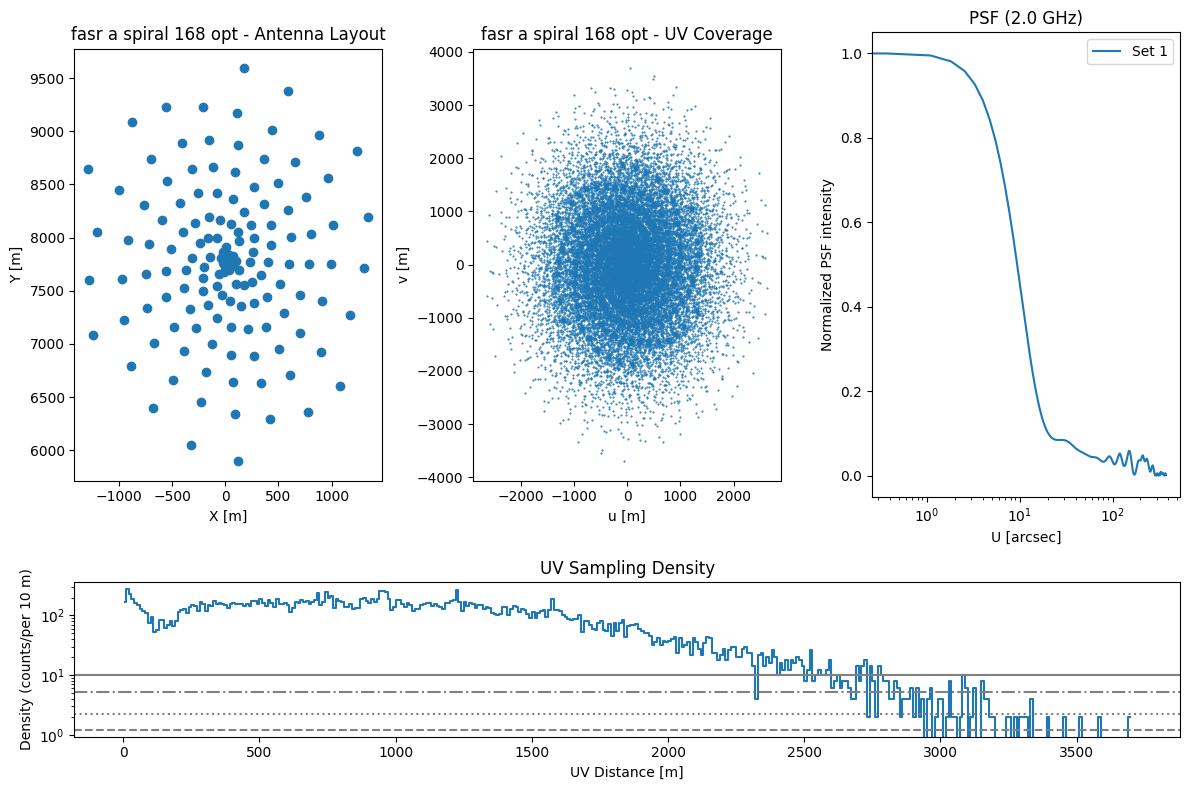

In [5]:
from importlib import reload

reload(fss)
positions_bc_opt, _ = fss.read_casa_antenna_list('fasr-a-spiral-168-opt.cfg')
fss.plot_all_panels(positions_bc_opt, "fasr a spiral 168 opt", nyq_sample=nyq_sample)

## Log Spiral Configuration

'generate_log_spiral_antenna_positions' completed at 2026-01-21 11:51:59; runtime: 0.00 seconds
fig saved to fig-fasr_Log_Spiral-168-n_arms=3-antennas_per_arm=56-alpha=1.00-gamma=0.55-r0=1.5-r_max=1800-n_turn=2.0.jpg
'plot_all_panels' completed at 2026-01-21 11:51:59; runtime: 0.31 seconds


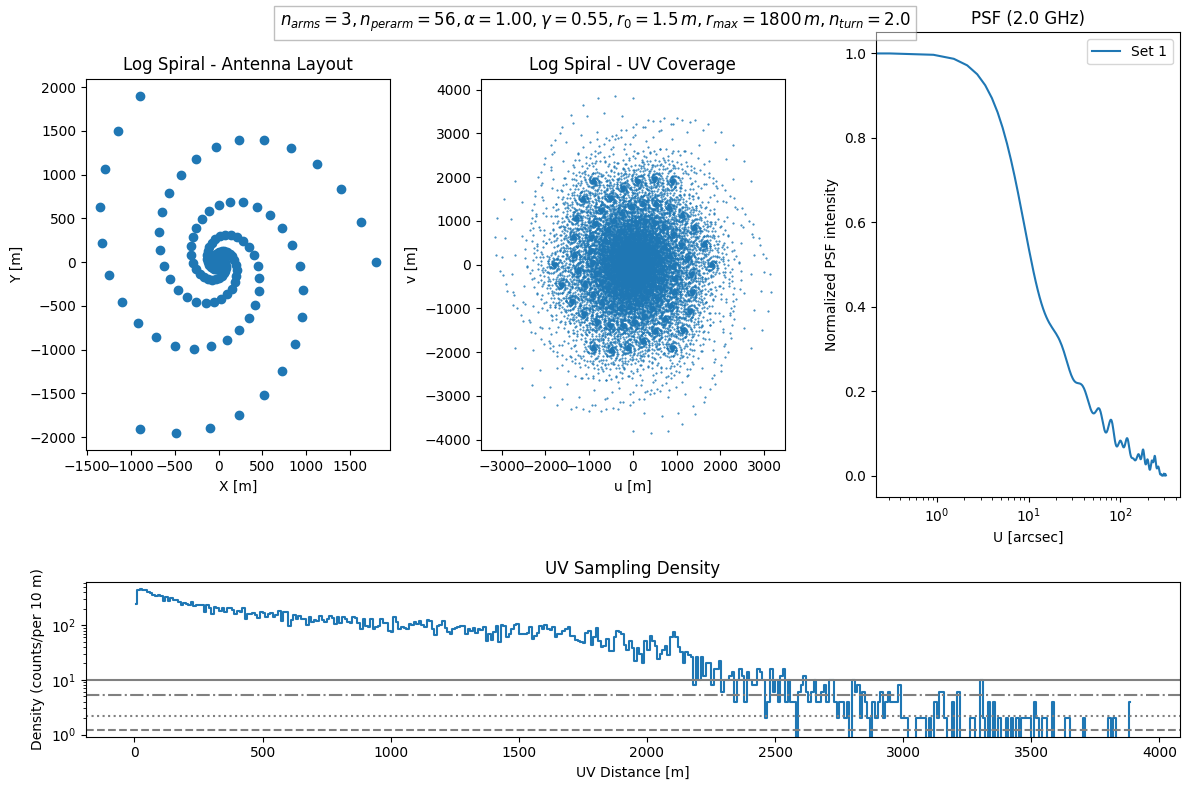

In [6]:
# %matplotlib notebook
%matplotlib inline
from importlib import reload

reload(fss)
# positions_logspiral = fss.generate_log_spiral_antenna_positions(n_arms=3, antennas_per_arm=50, alpha=2.05, gamma=0.9,
#                                                                 r0=2., r_max=2300)
# positions_logspiral = fss.generate_log_spiral_antenna_positions(n_arms=3, antennas_per_arm=50, alpha=1., gamma=0.7,
#                                                                 r0=2.5, r_max=2000, n_turn=1.71)
# positions_logspiral = fss.generate_log_spiral_antenna_positions(n_arms=3, antennas_per_arm=50, alpha=1., gamma=0.6,
#                                                                 r0=2, r_max=2100, n_turn=1.71)
# positions_logspiral = fss.generate_log_spiral_antenna_positions(n_arms=3, antennas_per_arm=50, alpha=1., gamma=0.5,
#                                                                 r0=1.5, r_max=2200, n_turn=1.4, latitude=35)
# positions_logspiral = fss.generate_log_spiral_antenna_positions(n_arms=3, antennas_per_arm=100, alpha=1., gamma=0.9,
#                                                                 r0=1.2, r_max=2300, n_turn=2., latitude=35)
# positions_logspiral = fss.generate_log_spiral_antenna_positions(n_arms=3, antennas_per_arm=56, alpha=1., gamma=0.5,
#                                                                 r0=1.5, r_max=2000, n_turn=1.4, latitude=35)

# Define log-spiral parameters
array_config = {"n_arms": 3, "antennas_per_arm": 56, "alpha": 1.0, "gamma": 0.55, "r0": 1.5, "r_max": 1800, "n_turn": 2,
                "latitude": 35}


positions_logspiral = fss.generate_log_spiral_antenna_positions(**array_config)
figname = (
    f"fig-fasr_Log_Spiral-{len(positions_logspiral)}-"
    f"n_arms={array_config['n_arms']}-antennas_per_arm={array_config['antennas_per_arm']}-"
    f"alpha={array_config['alpha']:.2f}-gamma={array_config['gamma']:.2f}-"
    f"r0={array_config['r0']:.1f}-r_max={array_config['r_max']:.0f}-n_turn={array_config['n_turn']:.1f}.jpg")
print(f'fig saved to {figname}')
figsubfolder = figname.rstrip('.jpg')
formatted_params = [
    rf"$n_{{\rm arms}}={array_config['n_arms']}$",
    rf"$\mbox{{antennas per arm}}={array_config['antennas_per_arm']}$",
    rf"$\alpha={array_config['alpha']:.2f}$",
    rf"$\gamma={array_config['gamma']:.2f}$",
    rf"$r_0={array_config['r0']:.1f}\,\mbox{{m}}$",
    rf"$r_{{\rm max}}={array_config['r_max']:.0f}\,\mbox{{m}}$",
    rf"$n_{{\rm turn}}={array_config['n_turn']:.1f}$"
]

# Create a full string that also includes the spiral equation.
array_config_str = (
    rf"$n_{{arms}}={array_config['n_arms']}, "
    rf"n_{{perarm}}={array_config['antennas_per_arm']}, "
    rf"\alpha={array_config['alpha']:.2f}, \gamma={array_config['gamma']:.2f}, "
    rf"r_0={array_config['r0']:.1f}\,m, r_{{max}}={array_config['r_max']:.0f}\,m, "
    rf"n_{{turn}}={array_config['n_turn']:.1f}$"
)
fss.plot_all_panels(positions_logspiral, "Log Spiral", frequency=2, nyq_sample=nyq_sample, figname=figname,
                    array_config_str=array_config_str)
# fig = plt.gcf()
# ax = fig.axes[0]
# ax.set_xlim(-10,10)
# ax.set_ylim(-10,10)

## Compare with Bin's optimized array configuration

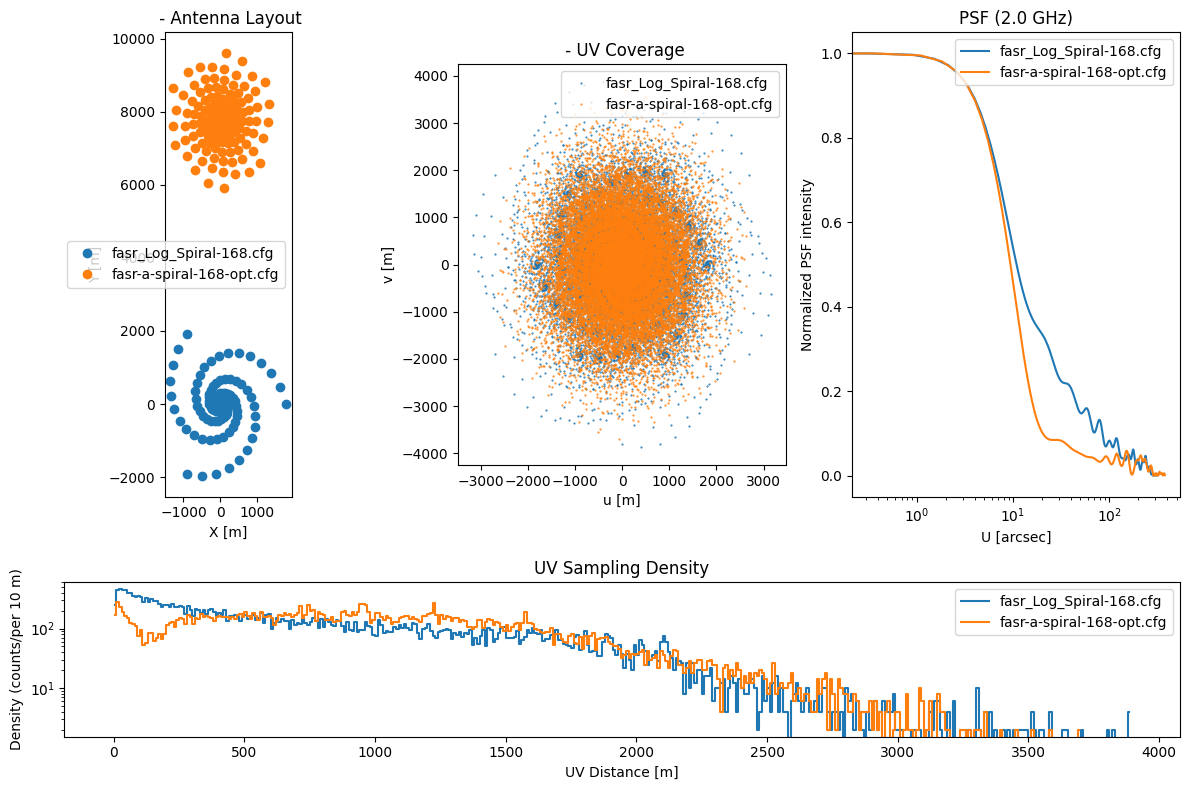

In [48]:
%matplotlib inline
from importlib import reload

reload(fss)
fss.plot_all_panels([positions_logspiral, positions_bc_opt],
                    labels=["fasr_Log_Spiral-168.cfg", 'fasr-a-spiral-168-opt.cfg'], frequency=2, nyq_sample=None,
                    psf_mode='uprofile')

## save the configuration

In [ ]:
# config_file = "fasr_antenna_list_Pseudo_Random.cfg"
# os.system('rm -rf ' + config_file)
# fss.write_casa_antenna_list(config_file, positions_pseudo)
config_file = f"fasr_Log_Spiral-{len(positions_logspiral)}.cfg"
os.system('rm -rf ' + config_file)
fss.write_casa_antenna_list(config_file, positions_logspiral)
# config_file = "fasr_logspiral_pseudo_random.cfg"
# os.system('rm -rf ' + config_file)
# write_casa_antenna_list(config_file, positions_comb)
# config_file = "fasr_antenna_list_Fib.cfg"
# os.system('rm -rf ' + config_file)
# write_casa_antenna_list(config_file, positions_fib)